# 1-Analysis of gold data
---

In [106]:
using CSV, DataFrames, StatsPlots, Statistics, Distributions, StatsBase, LinearAlgebra, CurveFit

## 1) Open File

In [2]:
GoldData = CSV.read("GOLD_dt=0.01666/Abolfazl_0.01666.txt", DataFrame, delim = " ")
Price = GoldData.P

6668739-element Vector{Float64}:
  415.395
  415.395
  415.12
  415.195
  415.395
  415.192
  415.131
  415.135
  415.129
  414.64
    ⋮
 1946.438
 1946.698
 1946.538
 1946.388
 1946.408
 1946.528
 1946.608
 1945.715
 1945.788

## 2) Calculating the difference, stdev and y

In [3]:
PriceDiff = diff(Price)
stdev = std(PriceDiff)
y = PriceDiff./stdev

6668738-element Vector{Float64}:
  0.0
 -0.7004736481901612
  0.1910382676882126
  0.5094353805019486
 -0.5170769112094423
 -0.1553777910531935
  0.0101887076100882
 -0.01528306141498751
 -1.2455695053274185
  0.08915119158790978
  ⋮
 -0.6877377636776233
  0.6622659946525477
 -0.4075483044017905
 -0.3820765353767148
  0.05094353805015142
  0.3056612283014877
  0.20377415220060568
 -2.274628973941404
  0.1859439138834581

## 3) Plot y

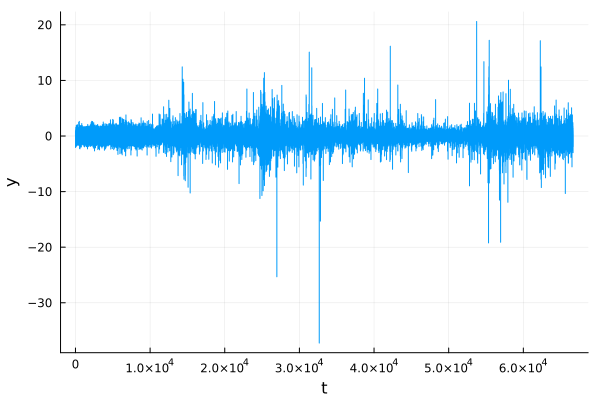

In [4]:
plot(y[begin:100:end], xlabel = "t", ylabel = "y", label = false)

## 4) Plotting the PDF of y

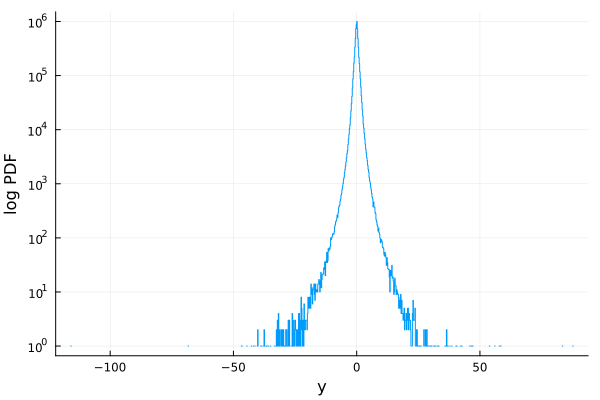

In [16]:
histogram(y, bins = 1000, yaxis = :log, xlabel = "y", ylabel = "log PDF", legend = false)

## 5) Finding the scaling exponent

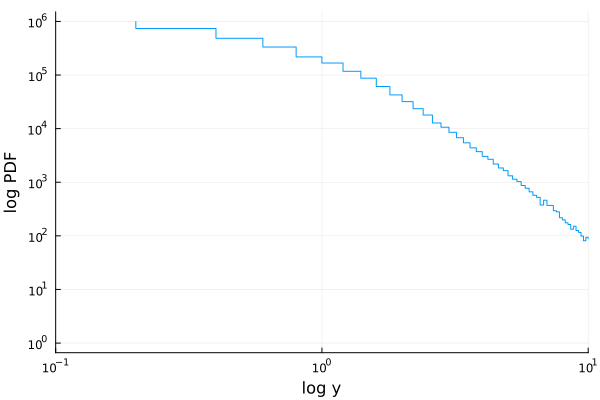

┌ Warning: Invalid negative or zero value -116.0 found at series index 1 for log10 based xscale
└ @ Plots /home/mohgh/.julia/packages/Plots/sxUvK/src/utils.jl:106
┌ Warning: Invalid negative or zero value -116.0 found at series index 1 for log10 based xscale
└ @ Plots /home/mohgh/.julia/packages/Plots/sxUvK/src/utils.jl:106
┌ Warning: Invalid negative or zero value -116.0 found at series index 1 for log10 based xscale
└ @ Plots /home/mohgh/.julia/packages/Plots/sxUvK/src/utils.jl:106


In [58]:
histogram(y, bins = 1000, yaxis = :log, xscale = :log10, xlims = (0.1, 10), xlabel = "log y", ylabel = "log PDF", legend = false)

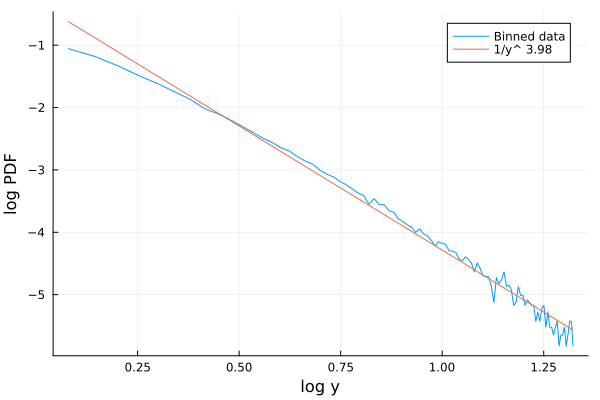

In [120]:
hist = Distributions.fit(Histogram, y, nbins = 1000)
hist = normalize(hist)
edges = collect(hist.edges[1])
index = findfirst(x -> x>1, edges)
weightslog = log10.(hist.weights[index:end])
edgeslog = log10.(edges[index:end])
pop!(edgeslog)
infIndex = []
for i in 1:size(weightslog)[1]
    if (weightslog[i] == -Inf)
        push!(infIndex, i)
    end
end
infIndex = reverse(infIndex)
for j in infIndex
        popat!(weightslog, j)
        popat!(edgeslog, j)
end
line = CurveFit.linear_fit(edgeslog[begin:100], weightslog[begin:100])
f(x) = line[1] + line[2] * x
exponent = -round(line[2], digits = 2)
plot(edgeslog[begin:100], weightslog[begin:100], ylabel = "log PDF", xaxis = "log y", label = "Binned data")
plot!(f, label = "1/y^ $exponent")